# Data Preprocessing 

In [1]:
# March 4th 2019 

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 

# Set working directory
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)') 
# Columns do not have titles, first row is the observations 
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
print(dataset.head)

<bound method NDFrame.head of       Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0

### Department of marketing prepared 10 great versions of the same ad. They are not sure which ad to put on the social network. They want to put the ad that leads to the best conversion rate. The ads are added to the social network. Based on CTR (Click through rate) we will decide which ad to use. 

### Each time a user connects with their account, we will show a version of the ad 

### Show the ad to 10,000 users. Based on the previous results, that will dictate which version of the ad is shown in the next round. The strategy depends on the beginning of the experiment to the present time. 

In [2]:
# Implementing random selection 

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [3]:
print(f"The total reward is {total_reward}, which generally is near 1200")

The total reward is 1209, which generally is near 1200


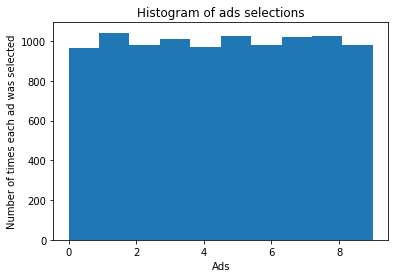

In [4]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [18]:
# Implementing UCB Algorithm step by step without a package 
import math 

numbers_of_selections = [0] * d # A vector of size d, consisting only of Zeros
sums_of_rewards = [0] * d 
N = 10000 # Number of rounds 
d = 10 # Versions of Ads
ads_selected = [] # an empty vector 
total_reward = 0

# Make a for loop for the round 
for n in range(0, N): 
    max_upper_bound = 0 
    ad = 0
    # compute average reward for each version of ad 
    for i in range(0, d): 
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(N+1)/numbers_of_selections[i]) # log functions cannot be on zeros 
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # set upper bound huge 
        if upper_bound > max_upper_bound: 
            max_upper_bound = upper_bound # anytime we find a new upper bound that is bigger than prior one, we update our max to that bound 
            ad = i 
        # Append the ad that was selected to tell us which ad was selected in each round 
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1 
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward 
        total_reward = total_reward + reward 
        


print(total_reward)       

22185


# Visualize Results 

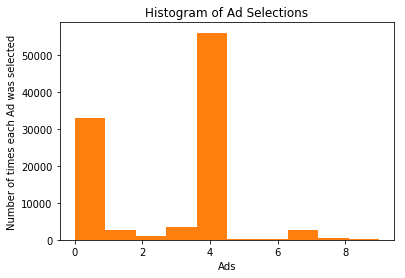

In [20]:
# Look at how many times each ad was selected 
plt.hist(ads_selected)
plt.title("Histogram of Ad Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()